## Credit Card Segmentation
#### Probem Statement: Develop a customer segmentation to define marketing strategy.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.DataFrame(pd.read_csv('F:/Edwisor/Project_1/credit-card-data.csv'))
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Missing Value Analysis

In [3]:
### Checking NA values
data.apply(lambda x: sum(x.isnull()/len(data)))

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [4]:
##Filling NA values
##Filling Credit Limit with mode and minimum Payments with median
data_filled=data.copy()
data_filled['CREDIT_LIMIT'] = data_filled['CREDIT_LIMIT'].fillna(data_filled['CREDIT_LIMIT'].value_counts().index[0])
data_filled['MINIMUM_PAYMENTS'] = data_filled['MINIMUM_PAYMENTS'].fillna(data_filled['MINIMUM_PAYMENTS'].median())

In [5]:
data_filled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Feature Engineering
###### Deriving new KPIS

In [6]:
### Monthly_Avg_purchase : total Purchases made per month
### Monthly_Cash_advance : total Cash Advances made per month
data_filled['MONTHLY_Avg_PURCHASE']=data_filled['PURCHASES']/data_filled['TENURE']
data_filled['MONTHLY_Cash_ADVANCE']=data_filled['CASH_ADVANCE']/data_filled['TENURE']

In [7]:
##A "one-off" payment would be something you make once for some particular charge 
##or fee, and then in the future you might pay a regular fee.

## Installment Purchase : Purchasing a commodity over a period of timeby paying installments over a timeframe
data_filled[['INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES']].describe()

,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES
count,8950.000000,8950.000000
mean,411.067645,592.437371
std,904.338115,1659.887917
min,0.000000,0.000000
25%,0.000000,0.000000
50%,89.000000,38.000000
75%,468.637500,577.405000
max,22500.000000,40761.250000


In [8]:
##Categorising the purchase type according to certain conditions
def purchase_type(data_filled):
    if (data_filled['ONEOFF_PURCHASES']>0) & (data_filled['INSTALLMENTS_PURCHASES']>0):
        return 'Both Types'
    elif (data_filled['ONEOFF_PURCHASES']>0) & (data_filled['INSTALLMENTS_PURCHASES']==0):
        return 'One-Off'
    elif (data_filled['ONEOFF_PURCHASES']==0) & (data_filled['INSTALLMENTS_PURCHASES']>0):
        return 'Installments'
    else :
        return 'No Purchase'

data_filled['PURCHASE_TYPE']=data_filled.apply(purchase_type,axis=1)            

In [9]:
data_filled.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_Avg_PURCHASE,MONTHLY_Cash_ADVANCE,PURCHASE_TYPE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installments
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,No Purchase
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One-Off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,One-Off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One-Off


In [10]:
### Credit limit is the maximum amount you can spend using your credit card at any given time
###balance to credit limit ratio
data_filled['LIMIT_USAGE']=data_filled.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

### payments to minimum payments ratio
data_filled['PAYMET_MINPAY_RATIO']=data_filled.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

### Feature Scaling

In [11]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
#### Applying standard scaling to remove any kind of outlier effect and bringing every feature to one scale
feature_scale=[feature for feature in data_filled.columns if feature not in ['CUST_ID','PURCHASE_TYPE'] ]
def normalize(data_filled):
    df_norm = data_filled.copy()
    for feature_name in feature_scale:
        max_value = df_norm[feature_name].max()
        min_value = df_norm[feature_name].min()
        df_norm[feature_name] = (df_norm[feature_name] - min_value) / (max_value - min_value)
    return df_norm

df_scaled=normalize(data_filled)
df_scaled.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_Avg_PURCHASE,MONTHLY_Cash_ADVANCE,PURCHASE_TYPE,LIMIT_USAGE,PAYMET_MINPAY_RATIO
0,C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,...,0.031720,0.003979,0.001826,0.000000,1.0,0.001945,0.000000,Installments,0.002571,0.000211
1,C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,...,0.232053,0.080893,0.014034,0.222222,1.0,0.000000,0.136685,No Purchase,0.028755,0.000559
2,C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,...,0.248748,0.012264,0.008210,0.000000,1.0,0.015766,0.000000,One-Off,0.020911,0.000145
3,C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,...,0.248748,0.000000,0.004088,0.000000,1.0,0.030567,0.004366,One-Off,0.013968,0.000000
4,C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,...,0.038397,0.013374,0.003204,0.000000,1.0,0.000326,0.000000,One-Off,0.042830,0.000405


### Additional Exploratory Data Analysis and Insights from KPIs

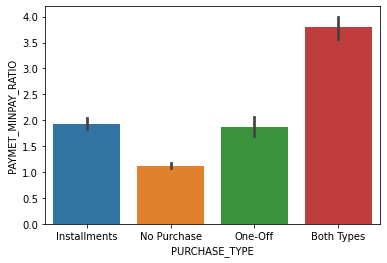

In [13]:
from numpy import median
data_copy=df_scaled.copy()
sns.barplot(x="PURCHASE_TYPE", y="PAYMET_MINPAY_RATIO", data=data_filled, estimator=median)

##### The median value for payment minpay ratio is the maximum for Both Installments and One-off Purchase type. 

Text(0.5, 1.0, 'Correlations')

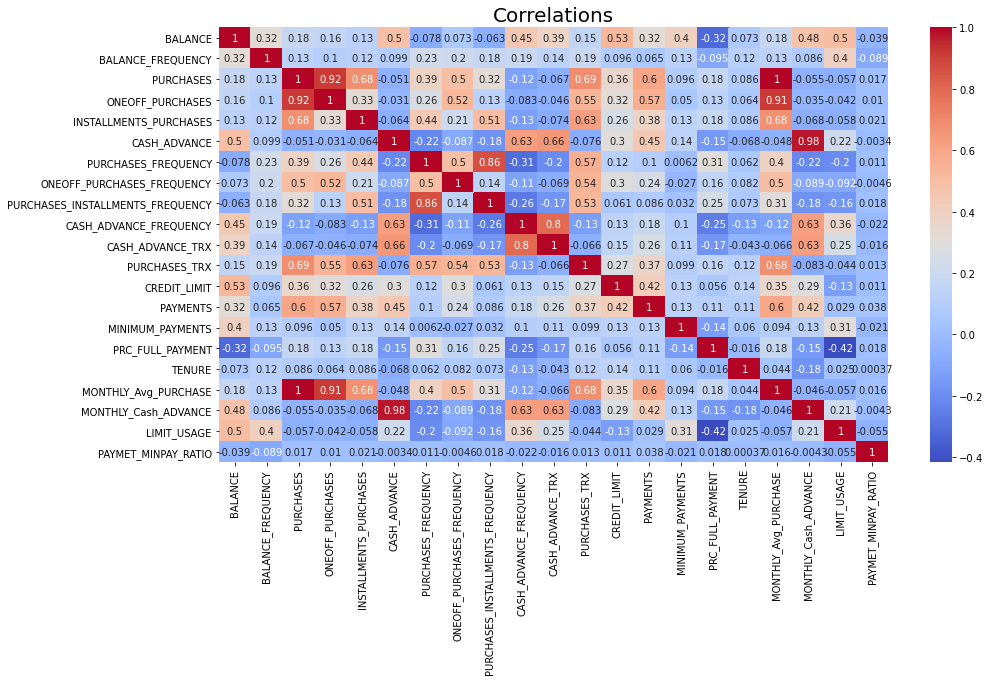

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df_scaled.corr(),cmap='coolwarm',annot=True);
plt.title('Correlations', size = 20)

###### Correlation plot to capture important traits: 
###### 1.Limit Usage is highly correlated with Balance. 
###### 2.Monthly Cash Advance is quite correlated to the differnt types of purchases like On-off,installmeants

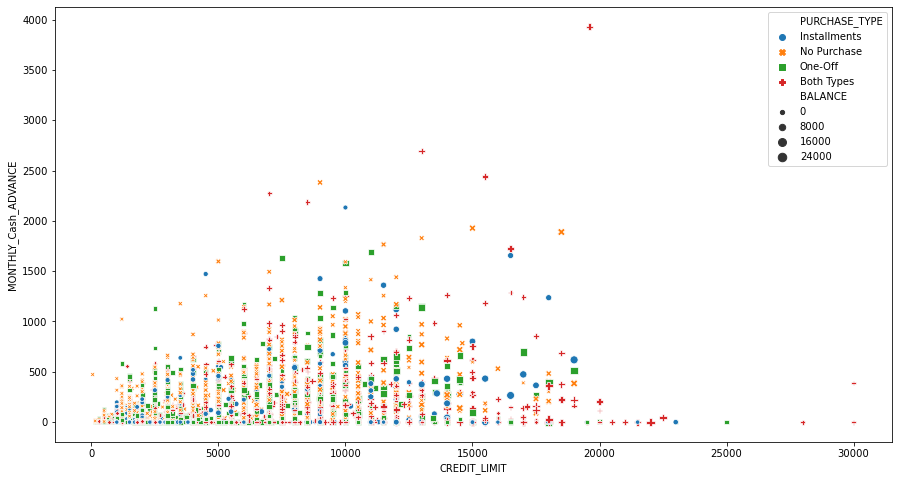

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="MONTHLY_Cash_ADVANCE", x="CREDIT_LIMIT",
                     hue="PURCHASE_TYPE", style="PURCHASE_TYPE", size='BALANCE', data=data_filled)

###### Most of the Credit Limit is skewed towards less than 10,000 and for Monthly Cash Advance less than 1000

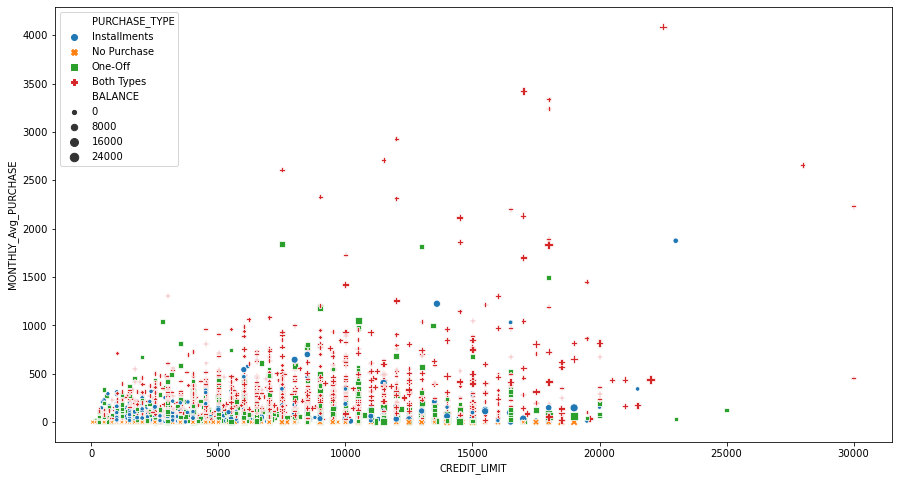

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="MONTHLY_Avg_PURCHASE", x="CREDIT_LIMIT",
                     hue="PURCHASE_TYPE", style="PURCHASE_TYPE", size='BALANCE', data=data_filled)

###### Most of the Credit Limit is skewed towards less than 10,000 and for Monthly Avg Purchase less than 1000

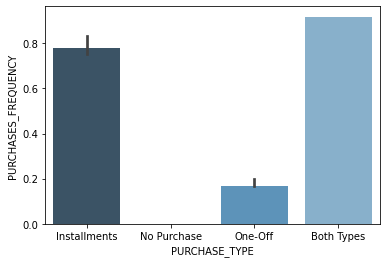

In [17]:
from numpy import median
sns.barplot(x="PURCHASE_TYPE", y="PURCHASES_FREQUENCY", data=data_copy, estimator=median, palette="Blues_d")

##### Customers with Both Types of Purchase pattern have more median Purchase frequency.

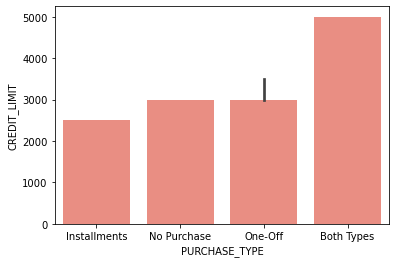

In [18]:
from numpy import median
sns.barplot(x="PURCHASE_TYPE", y="CREDIT_LIMIT", data=data_filled, estimator=median, color="salmon")

##### As seen the credit limit is high for both types category of purchases

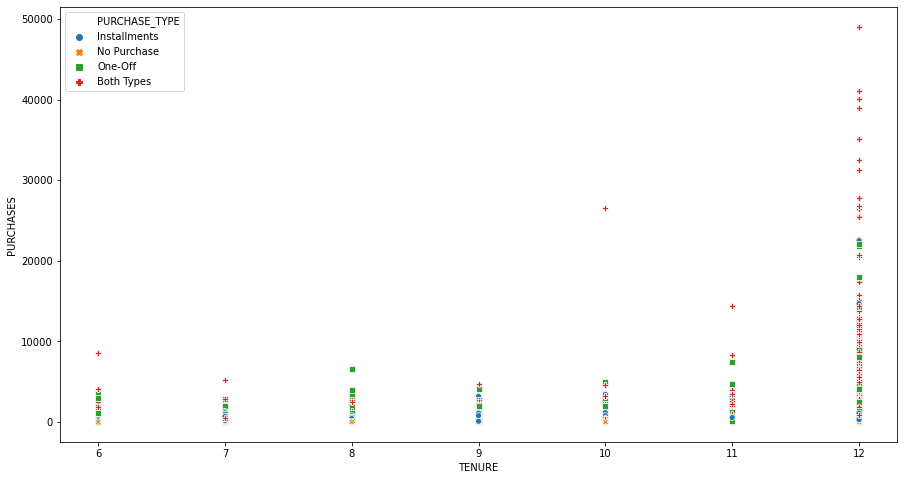

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="PURCHASES", x="TENURE",
                     hue="PURCHASE_TYPE", style="PURCHASE_TYPE", data=data_filled)

###### Most of the Purchases is done by customers with 12 yrs tenure

#### Dimensionality Reduction

In [20]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.decomposition import PCA
df_drop=df_scaled.drop(['CUST_ID','PURCHASE_TYPE'],axis=1)
variance_explained={}

In [21]:
for n in range(3,15):
    #pca = PCA(n_components=n, random_state=2)
    #df_pca=pca.fit(df_drop)
    pca = PCA(n_components=n)
    pca.fit_transform(df_drop)
    variance_explained[n]=sum(pca.explained_variance_ratio_)

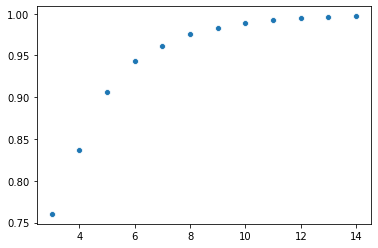

In [22]:
sns.scatterplot([i for i in variance_explained.keys()],[i for i in variance_explained.values()])

In [23]:
variance_explained

{3: 0.7603904879937089,
 4: 0.8365839573613602,
 5: 0.906049983623455,
 6: 0.9431096454557086,
 7: 0.9615747265556603,
 8: 0.9753011393684162,
 9: 0.9823299053008312,
 10: 0.9884365420131404,
 11: 0.992212656375674,
 12: 0.9944024707751866,
 13: 0.9957151425654518,
 14: 0.9969534967694094}

In [24]:
pca = PCA(n_components=6)
Reduced_dim_data=pca.fit_transform(df_drop)
###### Taking 6 dimensions as it is able to explain 94% of the variance.

In [25]:
df_reduced=pd.DataFrame(Reduced_dim_data)
df_reduced

,0,1,2,3,4,5
0,-0.481814,-0.098456,-0.043906,-0.059686,0.114734,-0.170515
1,-0.611030,-0.017697,0.078779,-0.215964,-0.109769,0.152816
2,0.305032,0.917901,0.016285,0.157338,0.167799,-0.164127
3,-0.587312,-0.004656,0.039837,0.002939,0.225035,0.065353
4,-0.554333,0.052666,-0.082988,-0.133998,-0.012420,-0.207345
...,...,...,...,...,...,...
8945,0.646445,-0.464664,0.206826,0.617645,-0.656212,-0.167267
8946,0.549404,-0.407049,-0.216309,0.782885,-0.493308,-0.210426
8947,0.359965,-0.423864,0.103741,0.747748,-0.471369,-0.151054
8948,-0.645774,-0.204685,0.281414,0.636312,-0.561873,-0.125259


### K means Clustering

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

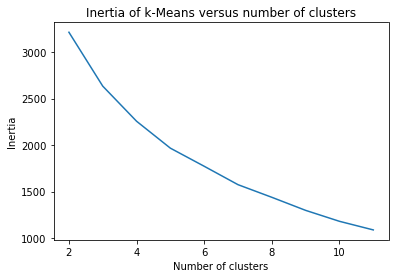

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
range=[0,1,2,3,4,5,6,7,8,9]
scores=[]
for i in range:
    score = KMeans(n_clusters=range[i]+2).fit(df_reduced).inertia_
    scores.append(score)       
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [27]:
from sklearn.metrics import silhouette_samples,silhouette_score
range_clusters=[3,4,5,6,7,8,9,10]
for n in range_clusters:
    kmeans = KMeans(n_clusters=n,random_state=2)
    labels=kmeans.fit_predict(df_reduced)
    silhouette_avg=silhouette_score(df_reduced,labels)
    print('For clusters = ',n,
         'The avg sillhoette score ',silhouette_avg)
    


For clusters =  3 The avg sillhoette score  0.39317854165506766
For clusters =  4 The avg sillhoette score  0.3487657546797296
For clusters =  5 The avg sillhoette score  0.35044243870255937
For clusters =  6 The avg sillhoette score  0.3668237220721306
For clusters =  7 The avg sillhoette score  0.3462049547879539
For clusters =  8 The avg sillhoette score  0.35658975748836536
For clusters =  9 The avg sillhoette score  0.3722051601600503
For clusters =  10 The avg sillhoette score  0.38203679321587575


##### Taking 3 clusters based on average sillhoette score

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,algorithm='auto')
kmeans.fit(df_reduced)

KMeans(n_clusters=3)

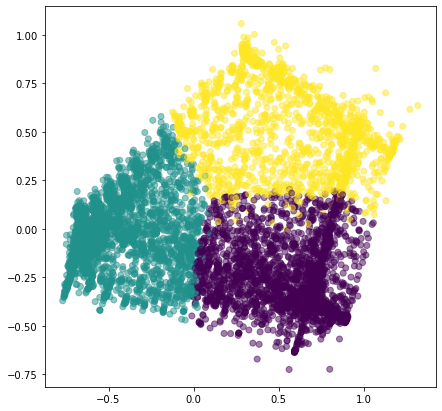

In [29]:
plt.figure(figsize=(7,7))
plt.scatter(Reduced_dim_data[:,0],Reduced_dim_data[:,1],c=kmeans.labels_,cmap='viridis',alpha=0.5)

##### DBSCAN

In [30]:
###### using another clustering algorithm to comapare

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples,silhouette_score
range=[0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5]
for i in range:
    print('eps value :'+str(i))
    dbscan = DBSCAN(eps = i,min_samples = 4).fit(df_reduced)
    core_samples_mask=np.zeros_like(dbscan.labels_,dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_]=True
    labels = dbscan.labels_
    print(set(labels))
    silhouette_avg=silhouette_score(df_reduced,labels)
    print("For eps ="+str(i),labels,
          'The average Silhoutte Score :',silhouette_avg)

eps value :0.06
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [32]:
range=[5,10,15,20,30,40,50,70,90,100,200,300,400,500]
for i in range:
    #print('min_samples value :'+str(i))
    dbscan = DBSCAN(eps = 0.3,min_samples = i).fit(df_reduced)
    core_samples_mask=np.zeros_like(dbscan.labels_,dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_]=True
    labels = set([label for label in dbscan.labels_ if label >=0])
    print(set(labels))
    #silhouette_avg=silhouette_score(df_reduced,labels)
    print("For min samples ="+str(i),labels,
          'The total clusters :'+str(len(set(labels))))

{0, 1, 2, 3}
For min samples =5 {0, 1, 2, 3} The total clusters :4
{0}
For min samples =10 {0} The total clusters :1
{0}
For min samples =15 {0} The total clusters :1
{0}
For min samples =20 {0} The total clusters :1
{0}
For min samples =30 {0} The total clusters :1
{0}
For min samples =40 {0} The total clusters :1
{0, 1, 2}
For min samples =50 {0, 1, 2} The total clusters :3
{0, 1, 2, 3, 4}
For min samples =70 {0, 1, 2, 3, 4} The total clusters :5
{0, 1, 2}
For min samples =90 {0, 1, 2} The total clusters :3
{0, 1}
For min samples =100 {0, 1} The total clusters :2
{0, 1}
For min samples =200 {0, 1} The total clusters :2
{0}
For min samples =300 {0} The total clusters :1
{0, 1}
For min samples =400 {0, 1} The total clusters :2
{0, 1}
For min samples =500 {0, 1} The total clusters :2


In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples,silhouette_score
dbscan = DBSCAN(eps = 0.3, min_samples = 50)
clusters = dbscan.fit_predict(df_reduced)
labels = dbscan.labels_
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

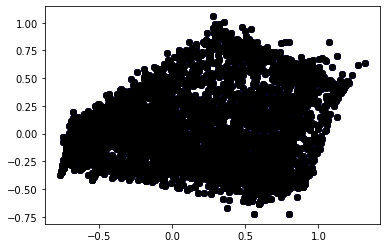

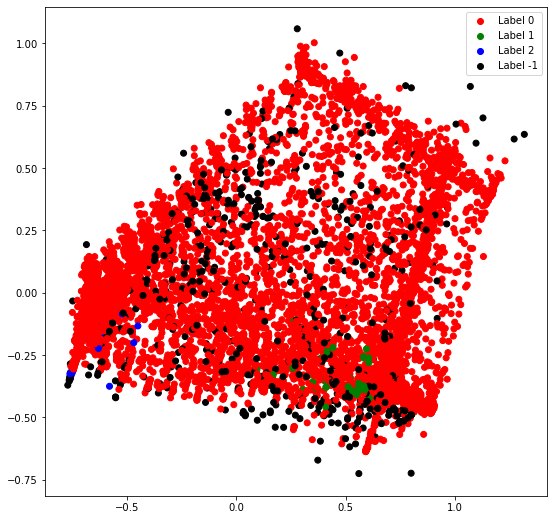

In [34]:
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
#colours[3] = 'm'
#colours[4] = 'y'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(Reduced_dim_data[:, 0], Reduced_dim_data[:, 1], color ='r') 
g = plt.scatter(Reduced_dim_data[:, 0], Reduced_dim_data[:, 1], color ='g') 
b = plt.scatter(Reduced_dim_data[:, 0], Reduced_dim_data[:, 1], color ='b') 
#m = plt.scatter(Reduced_dim_data[:, 0], Reduced_dim_data[:, 1], color ='m')
#y = plt.scatter(Reduced_dim_data[:, 0], Reduced_dim_data[:, 1], color ='y') 
k = plt.scatter(Reduced_dim_data[:, 0], Reduced_dim_data[:, 1], color ='k') 

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(Reduced_dim_data[:, 0], Reduced_dim_data[:,1 ], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b,k), ('Label 0', 'Label 1', #'Label 3','Label 4',
                          'Label 2',#'Label 3',#'Label 4'
                           'Label -1')) 
  
plt.show() 

In [35]:
cluster_analysis=pd.concat([data_filled,pd.Series(dbscan.labels_,name='Cluster')],axis=1)

In [36]:
cluster_analysis.groupby('Cluster').apply(lambda x: x[x.columns].mean()).T

Cluster,-1,0,1,2
BALANCE,1225.872425,1596.604741,811.325710,36.197070
BALANCE_FREQUENCY,0.755454,0.886806,0.970443,0.140700
PURCHASES,1844.200953,953.232203,428.771897,183.454783
ONEOFF_PURCHASES,1257.132266,552.967517,45.658448,168.772609
INSTALLMENTS_PURCHASES,587.608255,400.551782,383.113448,14.682174
CASH_ADVANCE,1383.203265,954.825170,803.175049,338.680455
PURCHASES_FREQUENCY,0.655870,0.477325,0.935037,0.075483
ONEOFF_PURCHASES_FREQUENCY,0.294473,0.197893,0.029043,0.065217
PURCHASES_INSTALLMENTS_FREQUENCY,0.414622,0.358946,0.809011,0.015097
CASH_ADVANCE_FREQUENCY,0.155229,0.133785,0.166564,0.061594


In [37]:
cluster_analysis=pd.concat([data_filled,pd.Series(kmeans.labels_,name='Cluster')],axis=1)
cluster_analysis.groupby('Cluster').apply(lambda x: x[x.columns].mean()).T

Cluster,0,1,2
BALANCE,1137.358608,1705.090133,1929.208142
BALANCE_FREQUENCY,0.914357,0.826148,0.973660
PURCHASES,1072.856272,296.193690,3194.955769
ONEOFF_PURCHASES,272.781695,232.954593,2394.744579
INSTALLMENTS_PURCHASES,800.718714,63.428006,800.211190
CASH_ADVANCE,501.213975,1356.331147,662.092384
PURCHASES_FREQUENCY,0.871624,0.143655,0.892619
ONEOFF_PURCHASES_FREQUENCY,0.099734,0.081579,0.799268
PURCHASES_INSTALLMENTS_FREQUENCY,0.821007,0.060919,0.478738
CASH_ADVANCE_FREQUENCY,0.070597,0.185717,0.093767


In [38]:
############ Fixing on Kmeans algorithm as it is perfectly divide the clusters.###########################